## 1- import Libraries 

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px 
import plotly.graph_objects as go

import warnings


from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import xgboost as xgb

warnings.filterwarnings('ignore')

## 2- Read dataset

In [2]:
data = pd.read_csv("/kaggle/input/heart-disease-dataset/heart.csv")

## 3- Data analysis

In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
data.shape

(303, 14)

In [6]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
298    False
299    False
300    False
301    False
302    False
Length: 303, dtype: bool

In [9]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

## 4- Data Visualization

In [11]:
df = pd.DataFrame(data)

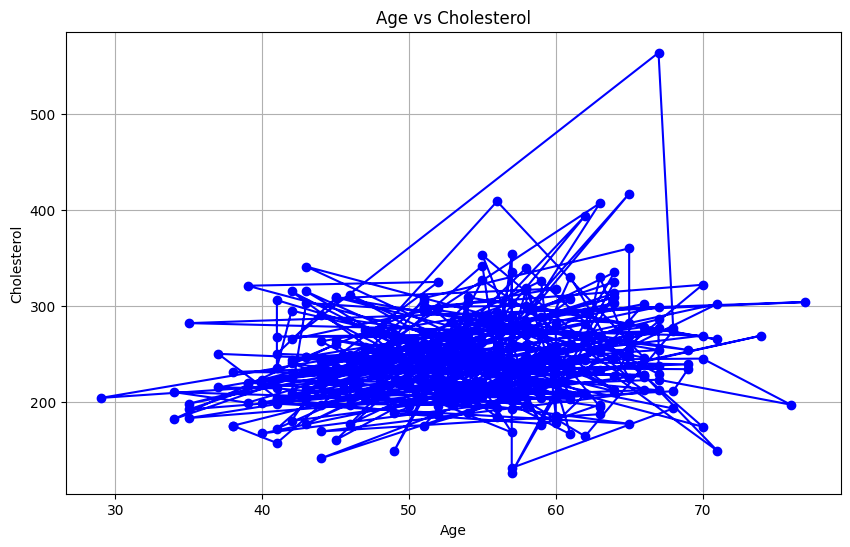

In [12]:
plt.figure(figsize=(10, 6))
plt.plot(df['age'], df['chol'], marker='o', color='b')
plt.title('Age vs Cholesterol')
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.grid(True)
plt.show()

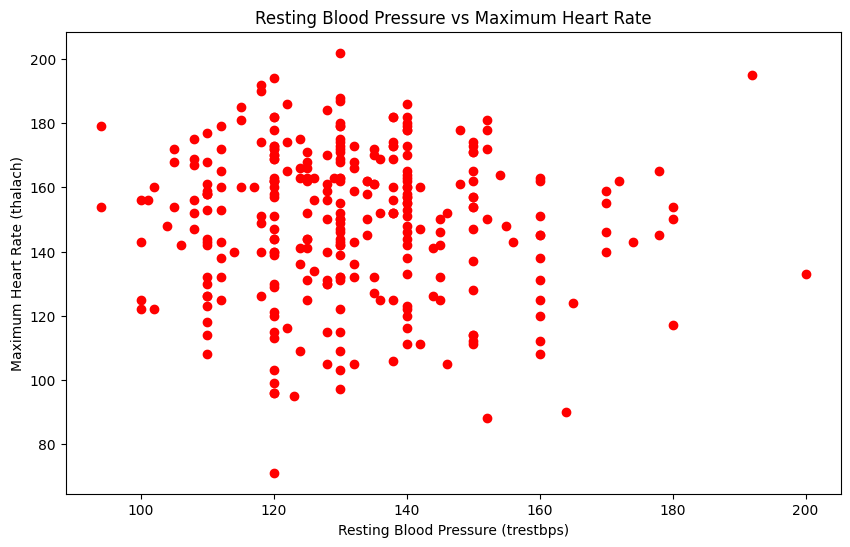

In [13]:
plt.figure(figsize=(10, 6))
plt.scatter(df['trestbps'], df['thalach'], color='r')
plt.title('Resting Blood Pressure vs Maximum Heart Rate')
plt.xlabel('Resting Blood Pressure (trestbps)')
plt.ylabel('Maximum Heart Rate (thalach)')
plt.show()

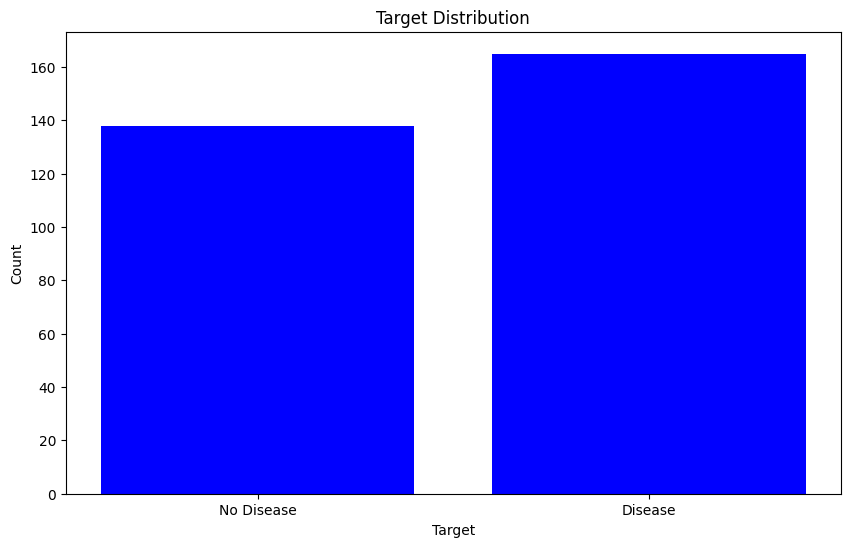

In [14]:
plt.figure(figsize=(10, 6))
plt.bar(df['target'].value_counts().index, df['target'].value_counts().values, color='blue')
plt.title('Target Distribution')
plt.xlabel('Target')
plt.ylabel('Count')
plt.xticks([0, 1], ['No Disease', 'Disease'])
plt.show()

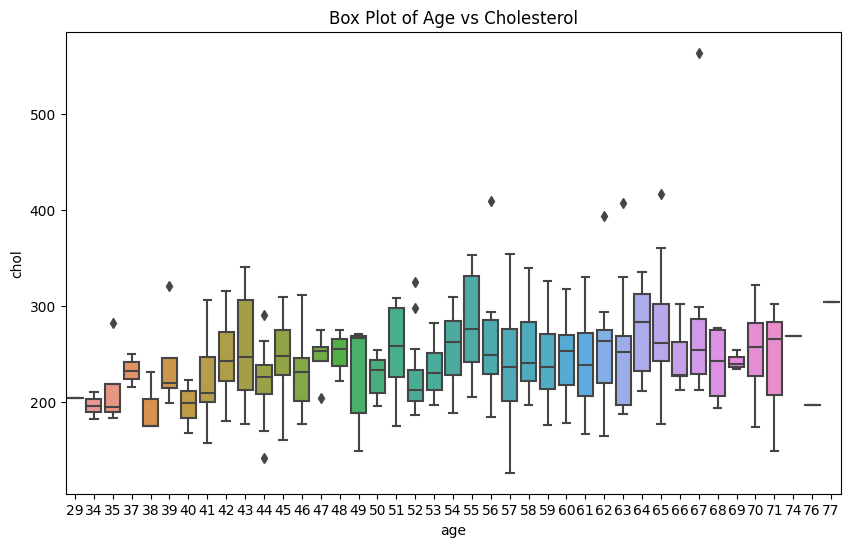

In [15]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='age', y='chol', data=df)
plt.title('Box Plot of Age vs Cholesterol')
plt.show()

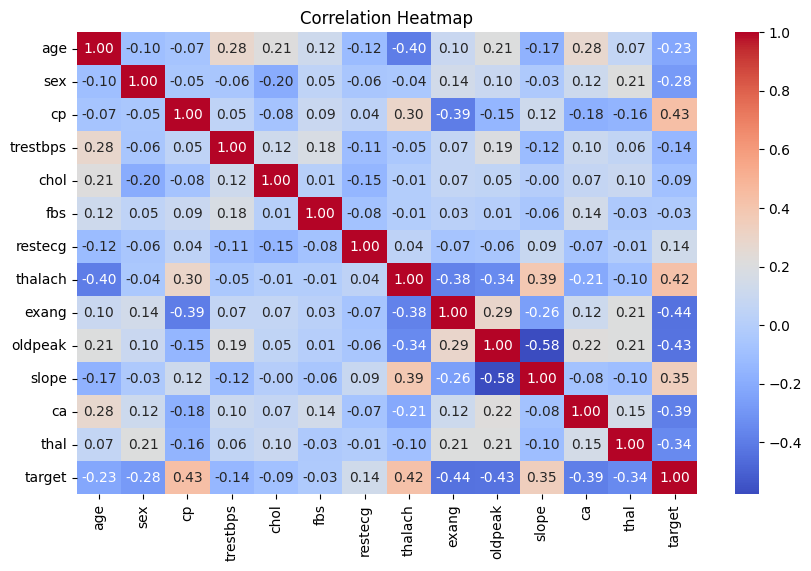

In [16]:
plt.figure(figsize=(10, 6))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [17]:
fig = px.line(df, x='age', y='chol', title='Interactive Line Plot of Age vs Cholesterol')
fig.show()

In [18]:
fig = px.scatter(df, x='age', y='thalach', color='sex', title='Interactive Scatter Plot of Age vs Thalach (Colored by Sex)')
fig.show()

In [19]:
fig = px.pie(df, names='target', title='Pie Chart of Target Distribution', labels={'target':'Heart Disease'})
fig.update_traces(hole=.4, hoverinfo="label+percent+value")
fig.show()


In [20]:
fig = px.scatter_3d(df, x='age', y='chol', z='thalach', color='target', title='3D Scatter Plot of Age, Cholesterol, and Thalach')
fig.show()

## 5- Spiliting the data 

In [21]:
x = data[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal']]

y = data["target"]

In [22]:
x_train , x_test , y_train , y_test = train_test_split(x,y, test_size = 0.2 , random_state =42)

In [23]:
x_train.shape

(242, 13)

In [24]:
x_test.shape

(61, 13)

## 6- Building the model

In [25]:
model = xgb.XGBClassifier(
    objective = "binary:logistic",
    learning_rate = 0.5,
    max_depth = 15,
    n_estimators =  150 , 
    random_state = 42
)

In [26]:
model.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.5, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=15, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=150, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [27]:
y_pred = model.predict(x_test)

In [28]:
y_pred

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

## 7- Evaluating the model

In [29]:
accuracy = accuracy_score(y_test , y_pred)
print(f"Accuracy is : {accuracy:.4f}")

Accuracy is : 0.8361


In [30]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("confusion_matrix")
print(conf_matrix)

confusion_matrix
[[25  4]
 [ 6 26]]


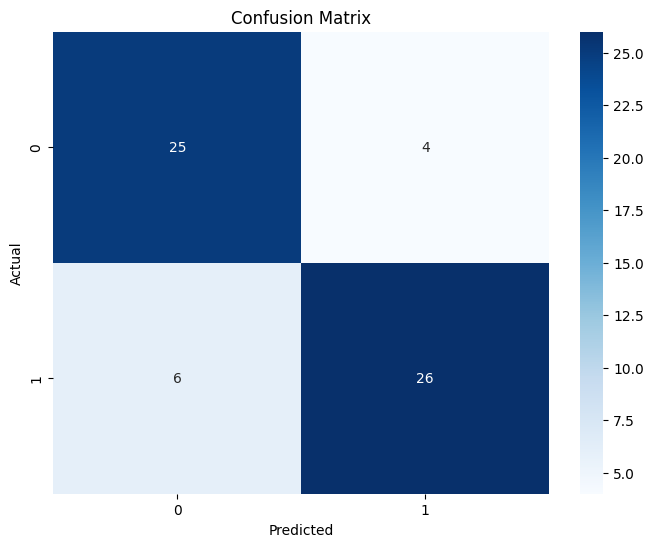

In [31]:
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [32]:
class_report = classification_report(y_test, y_pred)
print("classification_report")
print(class_report)

classification_report
              precision    recall  f1-score   support

           0       0.81      0.86      0.83        29
           1       0.87      0.81      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



## 8- Plot feature importance

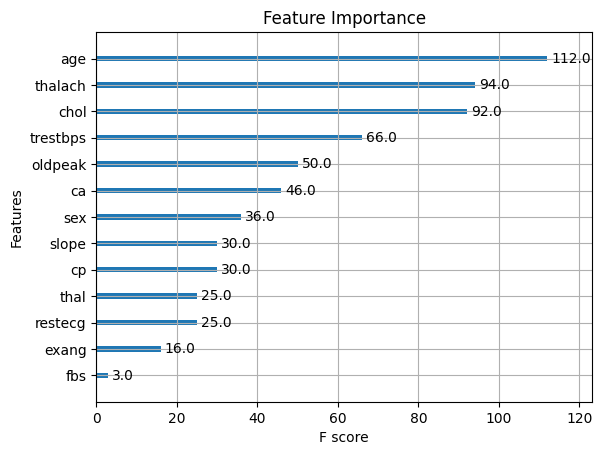

In [33]:
xgb.plot_importance(model)
plt.title("Feature Importance")
plt.show()